<a href="https://colab.research.google.com/github/ykim879/whats.todays.trend/blob/master/news_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Analyzer

In [5]:
import requests
import pandas as pd

In [25]:
response = requests.get('https://newsapi.org/v2/sources?'
			   'language=en&country=us&'
			   'apiKey=55b9f473b6e642ac862d315a124c6619')
sources = response.json()['sources']
df = pd.DataFrame();
pd.set_option('display.max_columns', 7)
for source in sources:
  row = pd.Series(source)
  df = df.append(row, ignore_index = True)
df.set_index("name", inplace = True)

In [1]:
print(df)

NameError: name 'df' is not defined

## Method: eachNewsHeadlines
### collects each 55 news headline

In [35]:
def eachNewsHeadlines(ID):
	response = requests.get('https://newsapi.org/v2/top-headlines?sources=' + ID + '&apiKey=55b9f473b6e642ac862d315a124c6619')
	json = response.json()
	if json['status'] != 'ok':
		raise IOError('API key is probably overused :(')
	topNews = []
	topNews.append(ID)
	for elem in json['articles']:
		topNews.append(elem['title'])
	return topNews

In [45]:
headlines = []
for id in df['id']:
  headlines.append(eachNewsHeadlines(id))

['abc-news', 'Protesters arrested in Charlotte as GOP delegates arrive', 'Trump ordered to pay $44,100 in Stormy Daniels legal fees', 'US WeChat users sue Trump over order banning messaging app', 'House set to vote on USPS bill amid mail-in voting controversy', 'Officials: Police shoot, kill man outside store in Louisiana', 'Statue of lauded rocker Chris Cornell vandalized in Seattle', "Family says USPS lost veterans' remains", 'Tropical Storm Laura, Marco simultaneously heading toward Gulf of Mexico', 'Smoke fills air as Portland police clear riot at precinct', "Steve Bannon calls his arrest 'a political hit job,' says effort was in support of Trump"]
['al-jazeera-english', 'West African mediators arrive in Mali to push for coup reversal', "Alexei Navalny's health condition 'very worrying'", 'Global coronavirus death toll hits 800,000: Live news']
['ars-technica', 'New Wonder Woman 1984 trailer offers first look at Kristen Wiig’s Cheetah', 'Hint of COVID-19 immunity: 3 sailors with an

## Method: parseWords
### this will parse the headlines to count how many times each vocabs appears in headlines

In [37]:
import re

In [51]:
def parseWords(headlines, dic):
  for headline in headlines:
    for line in headline[1:]:
      vocabs = re.split('\W+', line)
      for vocab in vocabs:
        if vocab in dic:
          dic[vocab] += 1
        else:
          dic[vocab] = 1

In [4]:
parseVocab = {'Protesters': 3, 'arrested': 1, 'in': 83, 'Charlotte': 1, 'as': 19, 'GOP': 16, 'delegates': 1, 'arrive': 2, 'Trump': 54, 'ordered': 2, 'to': 122, 'pay': 3, '44': 2, '100': 7, 'Stormy': 2, 'Daniels': 2, 'legal': 2, 'fees': 2, 'US': 8, 'WeChat': 1, 'users': 2, 'sue': 3, 'over': 9, 'order': 1, 'banning': 1, 'messaging': 1, 'app': 3, 'House': 15, 'set': 3, 'vote': 9, 'on': 47, 'USPS': 8, 'bill': 3, 'amid': 5, 'mail': 5, 'voting': 3, 'controversy': 1, 'Officials': 3, 'Police': 5, 'shoot': 1, 'kill': 1, 'man': 1, 'outside': 1, 'store': 1, 'Louisiana': 1, 'Statue': 1, 'of': 58, 'lauded': 1, 'rocker': 1, 'Chris': 2, 'Cornell': 1, 'vandalized': 1, 'Seattle': 1, 'Family': 1, 'says': 11, 'lost': 1, 'veterans': 1, 'remains': 1, 'Tropical': 2, 'Storm': 1, 'Laura': 2, 'Marco': 2, 'simultaneously': 1, 'heading': 1, 'toward': 1, 'Gulf': 6, 'Mexico': 2, 'Smoke': 2, 'fills': 1, 'air': 1, 'Portland': 5, 'police': 1, 'clear': 1, 'riot': 1, 'at': 13, 'precinct': 1, 'Steve': 2, 'Bannon': 1, 'calls': 5, 'his': 5, 'arrest': 2, 'a': 54, 'political': 2, 'hit': 1, 'job': 1, 'effort': 1, 'was': 10, 'support': 1, 'West': 1, 'African': 1, 'mediators': 1, 'Mali': 1, 'push': 1, 'for': 47, 'coup': 1, 'reversal': 1, 'Alexei': 2, 'Navalny': 5, 's': 108, 'health': 3, 'condition': 1, 'very': 4, 'worrying': 1, '': 76, 'Global': 1, 'coronavirus': 10, 'death': 2, 'toll': 1, 'hits': 3, '800': 1, '000': 4, 'Live': 5, 'news': 6, 'New': 8, 'Wonder': 5, 'Woman': 5, '1984': 4, 'trailer': 4, 'offers': 1, 'first': 9, 'look': 4, 'Kristen': 3, 'Wiig': 3, 'Cheetah': 3, 'Hint': 1, 'COVID': 31, '19': 33, 'immunity': 2, '3': 6, 'sailors': 1, 'with': 19, 'antibodies': 1, 'spared': 1, 'outbreak': 2, 'sea': 1, 'This': 12, 'plane': 1, 'flies': 1, 'itself': 1, 'we': 6, 'went': 2, 'ride': 2, 'The': 59, 'race': 2, 'collect': 1, 'the': 82, 'pandemic': 8, 'history': 3, 'it': 14, 'unfolds': 1, 'Former': 2, 'Uber': 3, 'security': 1, 'chief': 1, 'faces': 5, 'criminal': 1, 'charges': 1, 'hiding': 1, '2016': 1, 'breach': 1, 'July': 3, 'hot': 1, 'one': 2, 'but': 4, 'here': 2, 'what': 5, 'NOAA': 1, 'sees': 2, 'ahead': 5, 'How': 20, 'do': 4, 'you': 8, 'fellow': 1, 'gamers': 1, 'Burger': 1, 'King': 1, 'exploits': 1, 'Twitch': 1, 'cheap': 1, 'ads': 3, 'Peer': 1, 'inside': 1, 'mummified': 1, 'cat': 2, 'from': 21, 'ancient': 1, 'Egypt': 1, 'courtesy': 1, 'high': 2, 'res': 1, '3D': 1, 'X': 2, 'rays': 1, 'Ancient': 1, 'lake': 1, 'sites': 2, 'suggest': 1, 'lots': 1, 'precipitation': 1, 'Mars': 1, 'Untested': 1, 'vaccine': 4, 'Sputnik': 1, 'V': 1, 'begins': 2, '40': 1, 'person': 3, 'trial': 1, 'next': 4, 'week': 1, 'London': 1, 'famous': 2, 'Tower': 1, 'Bridge': 1, 'gets': 3, 'stuck': 1, 'an': 11, 'open': 1, 'position': 2, '2': 7, 'bodies': 1, 'found': 4, 'missing': 1, 'after': 12, 'explosion': 1, 'Texas': 2, 'port': 1, 'Ketamine': 1, 'that': 8, 'injected': 1, 'during': 1, 'arrests': 1, 'draws': 1, 'new': 15, 'scrutiny': 1, 'AP': 2, 'EXCLUSIVE': 1, 'back': 4, 'school': 2, 'laptop': 1, 'shortage': 1, 'does': 3, 'spread': 2, 'concert': 1, 'Germans': 1, 'test': 3, 'FACT': 1, 'CHECK': 1, 'distortion': 1, 'Dems': 1, 'and': 53, 'pledge': 2, 'As': 2, 'more': 7, 'colleges': 2, 'stay': 1, 'online': 1, 'students': 3, 'demand': 2, 'tuition': 2, 'cuts': 2, 'bully': 1, 'pulpit': 1, 'pushes': 1, 'Washington': 2, 'virus': 2, 'resists': 1, 'Miami': 1, 'ICU': 1, 'nurse': 1, 'I': 11, 'have': 5, 'never': 3, 'my': 2, 'life': 2, 'seen': 2, 'so': 4, 'many': 2, 'deaths': 1, 'Democrats': 8, 'see': 1, 'racism': 1, 'mispronunciations': 1, 'Kamala': 4, 'Axios': 1, 'Pro': 2, 'Rata': 1, 'Silicon': 2, 'Valley': 2, 'x27': 1, 'Veep': 1, 'AirIPO': 1, 'Brooks': 2, 'Brothers': 1, 'lives': 2, 'busiest': 1, 'owner': 1, 'sports': 1, 'congressman': 1, 'condemns': 1, 'QAnon': 7, 'conspiracy': 2, 'theorist': 1, 'wins': 1, 'Georgia': 1, 'runoff': 1, 'Oversight': 2, 'chair': 1, 'introduces': 1, 'preserve': 1, 'services': 1, 'U': 16, 'S': 15, 'threatens': 1, 'veto': 1, 'UN': 1, 'peacekeeping': 1, 'Lebanon': 2, 'Hezbollah': 1, 'concerns': 1, 'Poll': 4, 'America': 6, 'confidence': 1, 'public': 3, 'system': 1, 'jumps': 2, 'Watch': 9, 'Gen': 2, 'Z': 2, 'future': 6, 'politics': 1, 'employability': 1, 'Milwaukee': 1, 'Industry': 1, 'digital': 1, 'update': 1, 'Coronavirus': 11, 'dashboard': 1, 'NBA': 5, 'Anthony': 1, 'Edwards': 1, 'B': 1, 'R': 3, 'Exclusive': 1, '2020': 24, 'MLB': 4, 'Prospect': 2, 'Power': 2, 'Rankings': 1, 'Top': 3, '30': 2, 'Catchers': 1, 'Addressing': 1, 'Biggest': 3, 'Questions': 1, 'About': 7, 'Draft': 2, 'Obi': 1, 'Toppin': 1, 'Trade': 1, 'Chips': 1, 'Available': 1, 'Sellers': 1, 'Ahead': 1, 'Deadline': 1, 'Long': 1, 'Shots': 1, 'Who': 5, 'Could': 5, 'Sneak': 1, 'into': 5, 'Lottery': 1, 'Players': 1, 'Drop': 1, 'Courtnite': 1, 'Student': 1, 'Travel': 1, 'Company': 1, 'STA': 1, 'Stops': 1, 'Trading': 1, 'K': 2, 'Fills': 1, 'Air': 1, 'Clear': 1, 'Riot': 2, 'Precinct': 2, 'Stressed': 1, 'Stocks': 2, 'Investors': 2, 'Are': 10, 'Betting': 1, 'Big': 5, 'Europe': 4, 'Sarah': 1, 'Halzack': 1, 'Clothing': 1, 'Stores': 1, 'Fight': 2, 'Back': 2, 'Podcast': 1, 'Boeing': 1, 'Fed': 1, 'Backstop': 1, 'Leaves': 1, 'Workers': 1, 'Lurch': 1, 'Flagging': 1, 'Brexit': 1, 'Negotiations': 1, 'Revive': 1}
#parseWords(headlines, parseVocab)
print(parseVocab)

{'Protesters': 3, 'arrested': 1, 'in': 83, 'Charlotte': 1, 'as': 19, 'GOP': 16, 'delegates': 1, 'arrive': 2, 'Trump': 54, 'ordered': 2, 'to': 122, 'pay': 3, '44': 2, '100': 7, 'Stormy': 2, 'Daniels': 2, 'legal': 2, 'fees': 2, 'US': 8, 'WeChat': 1, 'users': 2, 'sue': 3, 'over': 9, 'order': 1, 'banning': 1, 'messaging': 1, 'app': 3, 'House': 15, 'set': 3, 'vote': 9, 'on': 47, 'USPS': 8, 'bill': 3, 'amid': 5, 'mail': 5, 'voting': 3, 'controversy': 1, 'Officials': 3, 'Police': 5, 'shoot': 1, 'kill': 1, 'man': 1, 'outside': 1, 'store': 1, 'Louisiana': 1, 'Statue': 1, 'of': 58, 'lauded': 1, 'rocker': 1, 'Chris': 2, 'Cornell': 1, 'vandalized': 1, 'Seattle': 1, 'Family': 1, 'says': 11, 'lost': 1, 'veterans': 1, 'remains': 1, 'Tropical': 2, 'Storm': 1, 'Laura': 2, 'Marco': 2, 'simultaneously': 1, 'heading': 1, 'toward': 1, 'Gulf': 6, 'Mexico': 2, 'Smoke': 2, 'fills': 1, 'air': 1, 'Portland': 5, 'police': 1, 'clear': 1, 'riot': 1, 'at': 13, 'precinct': 1, 'Steve': 2, 'Bannon': 1, 'calls': 5, 'hi

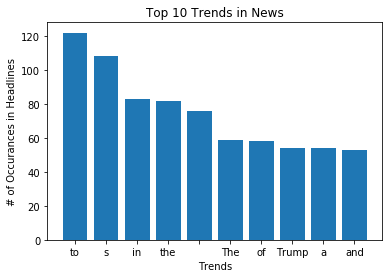

In [9]:
import matplotlib.pyplot as plt
top10Words = sorted(parseVocab, key = lambda x: parseVocab[x], reverse = True)[:10]
top10Occur = [parseVocab[x] for x in top10Words]
plt.bar(top10Words, top10Occur)
plt.title('Top 10 Trends in News')
plt.ylabel('# of Occurances in Headlines')
plt.xlabel('Trends')
plt.show()